<a href="https://colab.research.google.com/github/ECV21/Machine-learning-/blob/main/A_simple_classification_problem_Fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classifier problem to distinguish between different types of fruits

###We'll implement several machine learning algorithms using SCKIT-LEARN.

Using a simple dataset for the task of training a classifier to distinguish between different types of fruits.

The purpose of this post is to identify the machine learning algorithms thath is best-suited for the problem at hand; thus, we want to compare different algorithms, selecting the best-performing one.

#Data

The fruits dataset was created by Dr. Iain Murray from University of Endinburgh.

He bought a few dozen orange, leamons and apples of different varieties, and recorded their measurements in a table.

#Import libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data_fruits = pd.read_table('fruit_data_with_colors.txt')
data_fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


Each row of the dataset represents one piece of the fruits as represented by several features that are in the table's columns. We have 59 pieces of fruits and 7 features in the data set

In [3]:
#See summary of data
data_fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [4]:
#size of dataset

print(data_fruits.shape)

(59, 7)


In [6]:
#See unique fruits

print(data_fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [7]:
#group fruits by count

print(data_fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


The data is pretty balanced except mandarin.

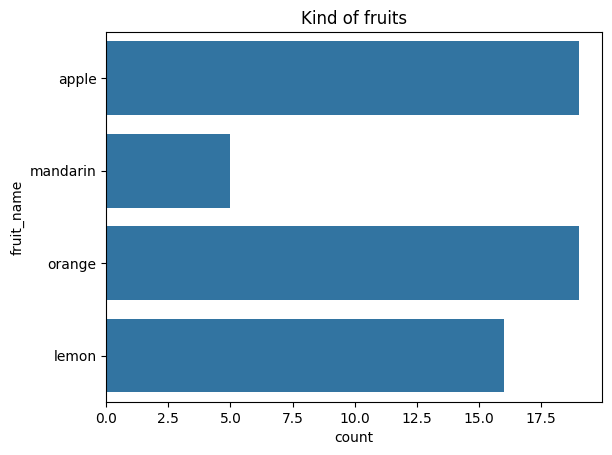

In [11]:
#see graph group by fruits

import seaborn as sns
import matplotlib.pyplot as plt # make sure to import matplotlib.pyplot

sns.countplot(data_fruits['fruit_name'],label="Count")
plt.title('Kind of fruits') # set the title using matplotlib.pyplot.title()
plt.show()

#Visualization

Box plot for each numeric variable will give us a clear idea for the distribution of the input variable:

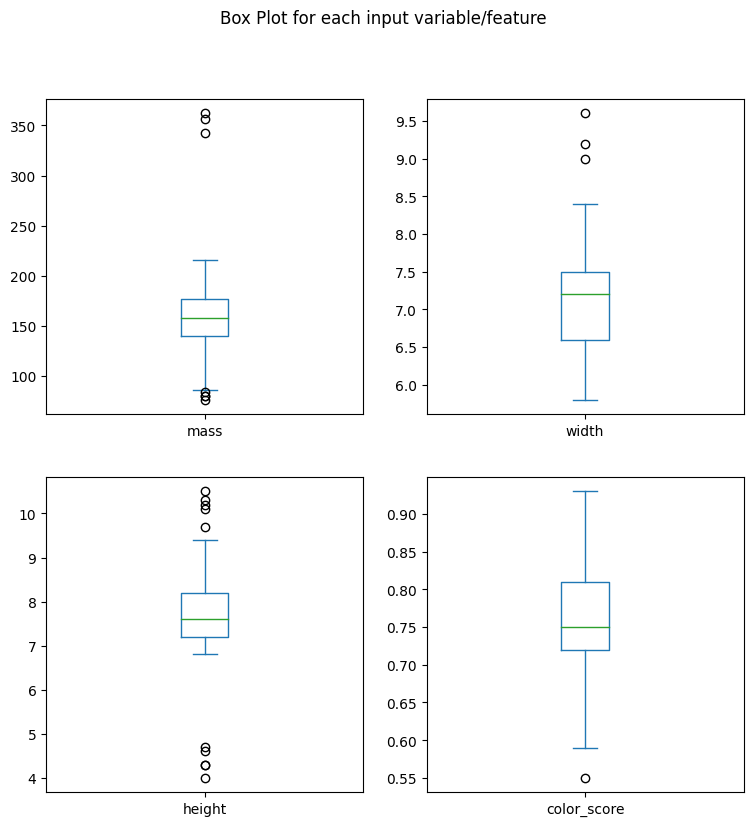

In [13]:
#Delete "fruit_label", generate boxplot for each features from data frame: data_fruits

data_fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9),
                                        title='Box Plot for each input variable/feature')
plt.savefig('fruits_box')
plt.show()

How to read boxplot:

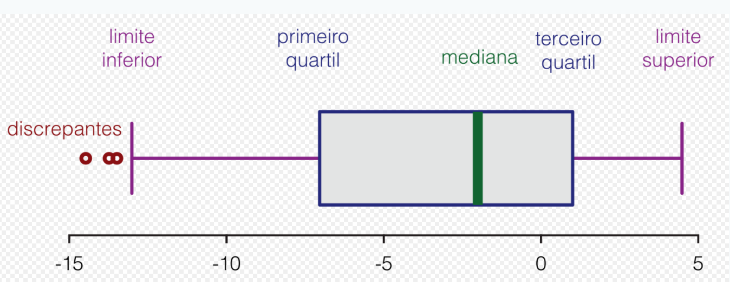

A boxplot is a statistical visualization tool that allows you to see the distribution of a dataset and highlights its key features.

* Box: represents the interquartile range (IQR), which is the distance berween the first quartile (Q1, the 25th percentile) and the third quartile (Q3, the 75th percentile). Thje line inside the box marks the median (the 50th percentile) of the data.
* Whiskers: Efrom the edges of the box (Q! and Q3) to the values that are not considered outliers. The whiskers usually reach uo to 1.5 times the IQR from Q1 and Q3.
*Outliers: Individual points that lie outside the range of the whiskers. There are values significantly distant from the rest of the data.


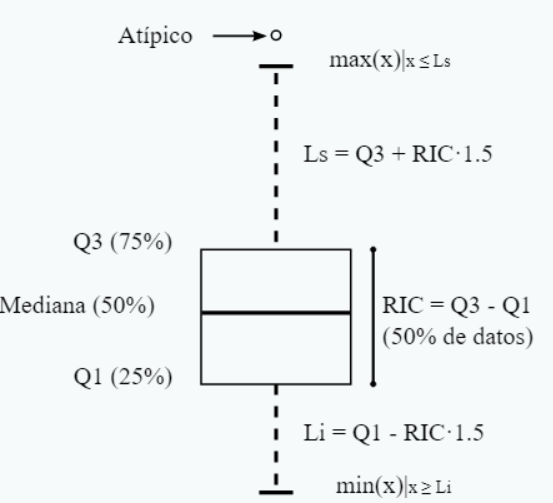


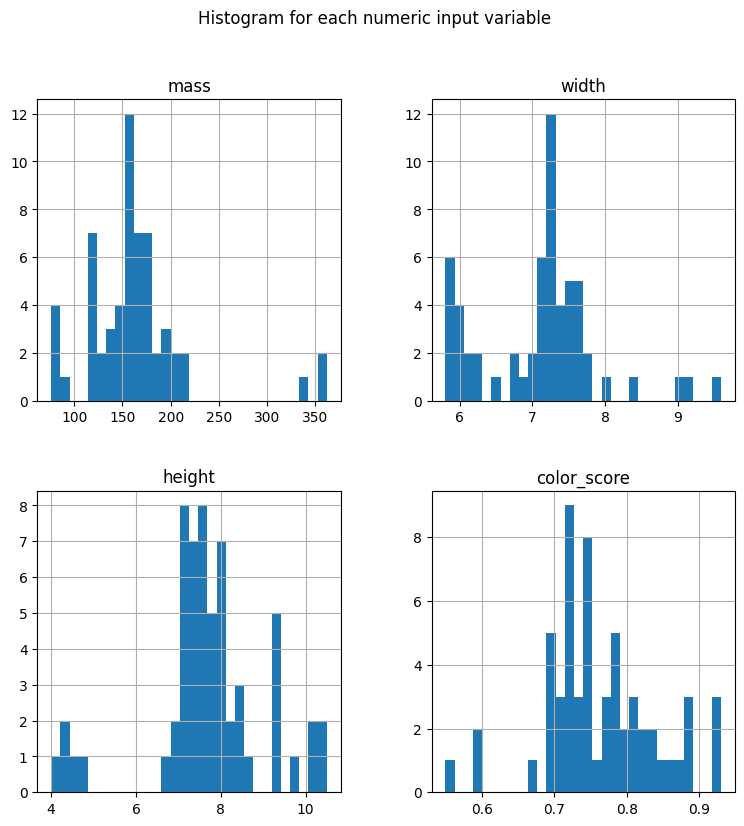

In [14]:
import pylab as pl
data_fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

We know that some pairs of attributes are correlated (mass and width).

<ipython-input-17-949edf209aec>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


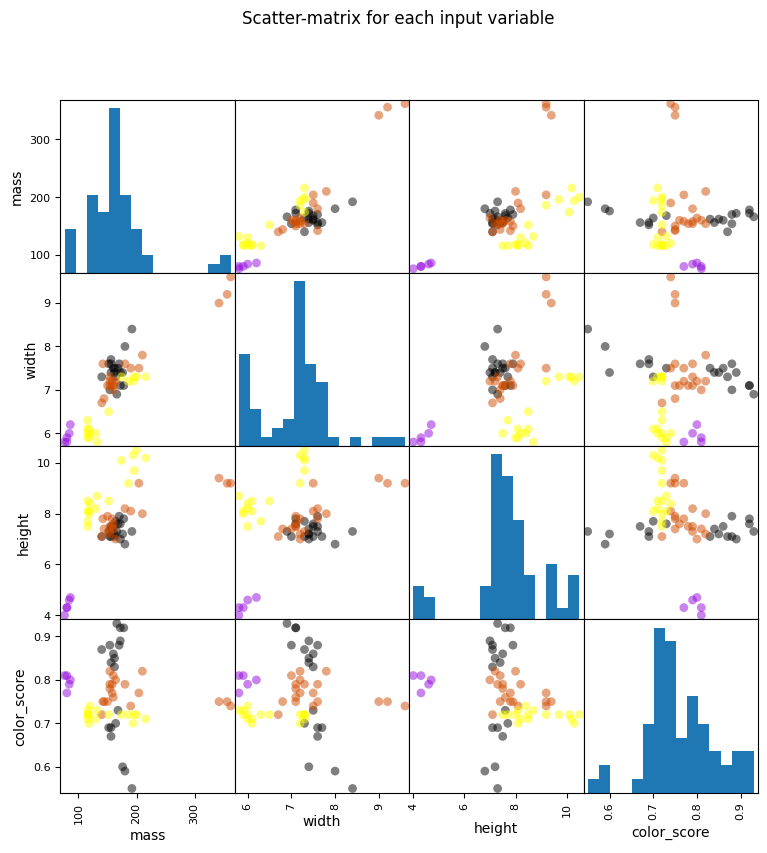

In [17]:
from pandas.plotting import scatter_matrix # import scatter_matrix from pandas.plotting
from matplotlib import cm
feature_names = ['mass', 'width', 'height', 'color_score']
X = data_fruits[feature_names]
y = data_fruits['fruit_label']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap) # call scatter_matrix without pd.
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

#Statistical summary

In [18]:
data_fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


We can see that the numerical values do not have the same scale. We will need to apply scaling to the test set that we computed for the trainig set.

#Create training and test sets and apply scaling

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Build models

# Logistic regression


Logistic regression is a statistical model used in binary classification problems where the target variable is categorical and usually represents two classes. Unlike linear regression, which predicts continuous values, logistic regression predits the probability of the target variable belonging to a particular class.

In [20]:
#Importing the logistic regression class
from sklearn.linear_model import LogisticRegression

#Initialize the logistic regression model
logreg = LogisticRegression()

#Train the model using the training data
logreg.fit(X_train, y_train)

#print the accurancy of the model on the trainig set
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))

#print the accurancy of the model on the test set
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47


# Decision tree

Decision trees are a type of supervised learning algorithm that is used for calssification and regression task. They work by splitting the data into subsets based on the value of input features. This process is recursively, resulting in a tree-like structure of decisions.

In [21]:
#importing the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#Initialize and train the Decison tree classifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

#print the accuracy of the model on the trainig set
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

#Print the accuracy of the model on the test set
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87


#K-Nearest Neigbors


K-Nearest Neighbors (KNN) is a simple, non-parametric, and lazy learning algorithm used for classification and regression task. The core idea is that a data point is classified based on how its neigbors are classified.

How KNN Works:

1. Choose the Number of Neighbors (K):
K is the number of nearest neighbors that will be used to make the prediction.
2. Calculate Distance:
For a given test data point, calculate the distance between the test point and all training data points. Common distance metrics include Euclidean distance, Manhattan distance, etc.
3. Find Nearest Neighbors:
Identify the K training data points that are closest to the test point.
4. Vote for Class Labels (Classification):
For classification tasks, the class label is determined by the majority vote of the K nearest neighbors.
5. Average for Regression:
For regression tasks, the predicted value is the average of the values of the K nearest neighbors.

In [22]:

#Importing the "kNeighborsClassfier" class from the sklearn modele:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN classifier with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Print the accuracy of the model on the training set
print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))

# Print the accuracy of the model on the test set
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))


Accuracy of KNN classifier on training set: 0.95
Accuracy of KNN classifier on test set: 0.93


#Linear Discriminant Analysis

LDA is a classification algorithm commonly used for dimensionality reduction and to find the linear combinations of features that best separate two or more classes of data.

How LDA Works:

1. Compute the Mean Vectors:
Calculate the mean vectors for each class in the dataset.
2. Compute the Scatter Matrices:
Within-class scatter matrix (measures the scatter of data points within the same class).
Between-class scatter matrix (measures the scatter between the mean vectors of different classes).
3. Compute Eigenvalues and Eigenvectors:
Solve the generalized eigenvalue problem to find the eigenvalues and eigenvectors of the scatter matrices.
Sort and Select Eigenvectors:
4. Sort the eigenvectors by their corresponding eigenvalues in descending order and select the top k eigenvectors to form the transformation matrix.
5. Transform the Dataset:
Project the data onto the new subspace formed by the selected eigenvectors.

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize and train the LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Print the accuracy of the model on the training set
print('Accuracy of LDA classifier on training set: {:.2f}'.format(lda.score(X_train, y_train)))

# Print the accuracy of the model on the test set
print('Accuracy of LDA classifier on test set: {:.2f}'.format(lda.score(X_test, y_test)))


Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


#Gaussian Naive Bayes


Gaussina Naives Bayes is a classification algorithm based ob Bayes' Theorem, with the assumption that the features follow a normal (Gaussian) distribution. It is particularly useful for contnuous data.


Steps in Gaussian Naive Bayes Classification:

1. Compute the Mean and Variance:
For each feature, compute the mean and variance for each class.
2. Calculate the Likelihood:
Use the Gaussian probability density function to compute the likelihood of the features given the class.
3. Apply Bayes' Theorem:
Combine the prior, likelihood, and evidence to compute the posterior probability for each class.
4. Prediction:
Assign the class with the highest posterior probability to the instance.

In [25]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Print the accuracy of the model on the training set
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))

# Print the accuracy of the model on the test set
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))


Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


#Support verctor machine

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It is particularly effective in high-dimensional spaces and for cases where the number of dimensions is greater than the number of samples.

How SVM Works:

1. Hyperplane:
SVM aims to find the optimal hyperplane that best separates the data into different classes. In two dimensions, this hyperplane is simply a line, but in higher dimensions, it can be a plane or a hyperplane.
2. Support Vectors:
The data points that are closest to the hyperplane are called support vectors. These points are critical because they define the position and orientation of the hyperplane.
3. Margin:
The margin is the distance between the hyperplane and the nearest data point from either class. SVM aims to maximize this margin, making the classifier more robust and less likely to overfit.
4. Kernel Trick:
SVM can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping the inputs into high-dimensional feature spaces.

In [26]:
from sklearn.svm import SVC

# Initialize and train the Support Vector Machine classifier
svm = SVC()
svm.fit(X_train, y_train)

# Print the accuracy of the model on the training set
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(X_train, y_train)))

# Print the accuracy of the model on the test set
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.80


The KNN algorithm was the most accurate model that we tried. The consusion matrix provides an indication of no error made on the test set.

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [1 0 7 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         1
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00         2

    accuracy                           0.93        15
   macro avg       0.95      0.97      0.96        15
weighted avg       0.95      0.93      0.93        15



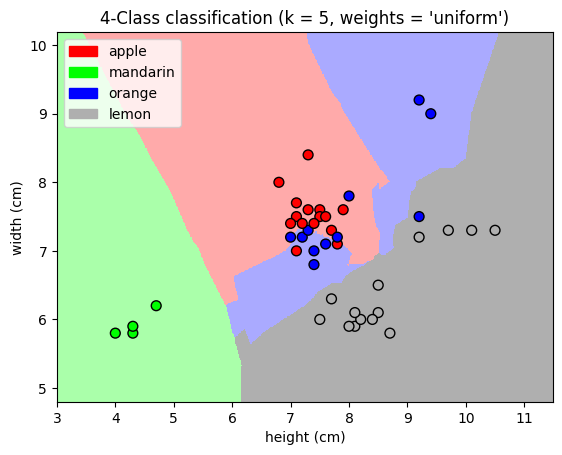

In [36]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
#!pip install numpy
import numpy as np
#!pip install -U scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import matplotlib.pyplot as plt

X = data_fruits[['mass', 'width', 'height', 'color_score']]
y = data_fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values # changed from .as_matrix() as it is deprecated
    y_mat = y.values # changed from .as_matrix() as it is deprecated
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
           % (n_neighbors, weights))
    plt.show()
plot_fruit_knn(X_train, y_train, 5, 'uniform')

Finding the best value of "k" for the KNN classifier that maximizes the model's accurancy.

The model is tested with different values of "k", and its performance is evaluated using a test dataset. The plot shows how accurance varies with the number of neighbors. Generally, the goal is to find the "k" value that provides the highest accuracy.

([<matplotlib.axis.XTick at 0x7b33f8d88d30>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

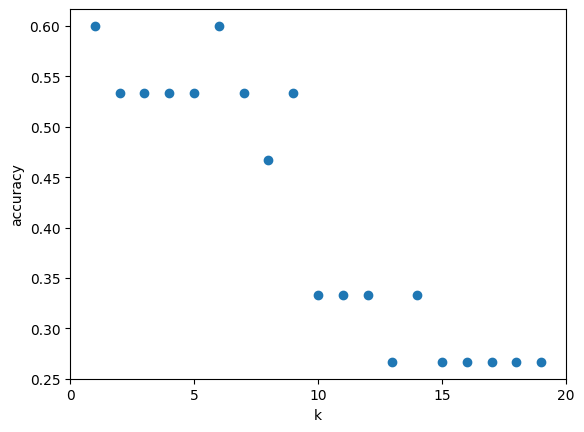

In [38]:
# Define a range of values for the number of neighbors, k, to test.
k_range = range(1, 20)

# Initialize an empty list to store the accuracy scores for each value of k.
scores = []

# Loop through each value in the range of k values.
for k in k_range:
    # Create an instance of the KNeighborsClassifier with the current value of k.
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the KNN model using the training data (X_train and y_train).
    knn.fit(X_train, y_train)

    # Evaluate the model using the test data (X_test and y_test) and append the accuracy to the scores list.
    scores.append(knn.score(X_test, y_test))

# Create a new figure for plotting.
plt.figure()

# Label the x-axis as 'k', which represents the number of neighbors.
plt.xlabel('k')

# Label the y-axis as 'accuracy', which represents the model's accuracy.
plt.ylabel('accuracy')

# Create a scatter plot with k_range on the x-axis and scores on the y-axis.
plt.scatter(k_range, scores)

# Set the tick marks on the x-axis to make the plot easier to read.
plt.xticks([0, 5, 10, 15, 20])


We obtain the highest accuracy when k=5.

#Conclusion

We saw that the KNN model was the best accuracy.